In [177]:
'''
GeneralNeuron:
        |
        |----------Sensory Neuron:
        |                |-----------Photoreceptor
        |                |-----------Mechanoreceptor
        |
        |
        |----------Motor Neuron:
|                       |-----------Alpha Motor Neuron
|                       |-----------Gamma Motor Neuron
|
 '''

'\nGeneralNeuron:\n        |\n        |----------Sensory Neuron:\n        |                |-----------Photoreceptor\n        |                |-----------Mechanoreceptor\n        |\n        |\n        |----------Motor Neuron:\n|                       |-----------Alpha Motor Neuron\n|                       |-----------Gamma Motor Neuron\n|\n '

In [178]:

pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [179]:
# Base class
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass

#intermediate class 
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self):
        pass

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass


# Leaf classes
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        pass



class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure):
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, activation_level):
        pass


In [180]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [181]:
import numpy as np
import matplotlib.pyplot as plt

def sin_sample(signal):
    # Compute the first derivative
    derivative = np.diff(signal)
    # Find indices where the derivative changes sign
    maxima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] <= 0))[0] + 1
    minima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] >= 0))[0] + 1

    #save every 5th point to reduce the signal
    short_signal = np.linspace(0,len(signal)-1, 5, dtype= int)
  
    #savind the indices of all of the critical points 
    critical_points = np.unique(np.concatenate((maxima_indices, minima_indices)))  

    #saving every 5th element plus the minima and maxima points, making sure every point in the graph is 
    # saved exactly once using the unique function. 
    all_indices = np.unique(np.concatenate((short_signal, critical_points)))  

    #returning the new array 
    return signal[all_indices], all_indices, signal[critical_points], critical_points


Downsized Signal: 15
Original Signal: 100


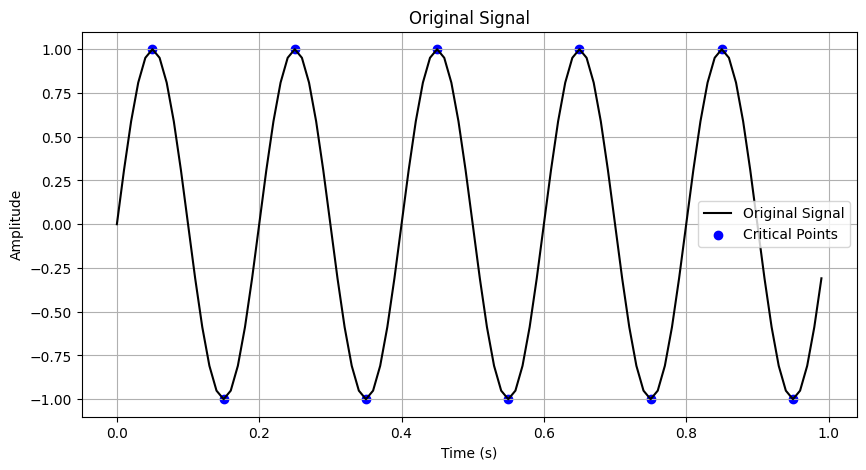

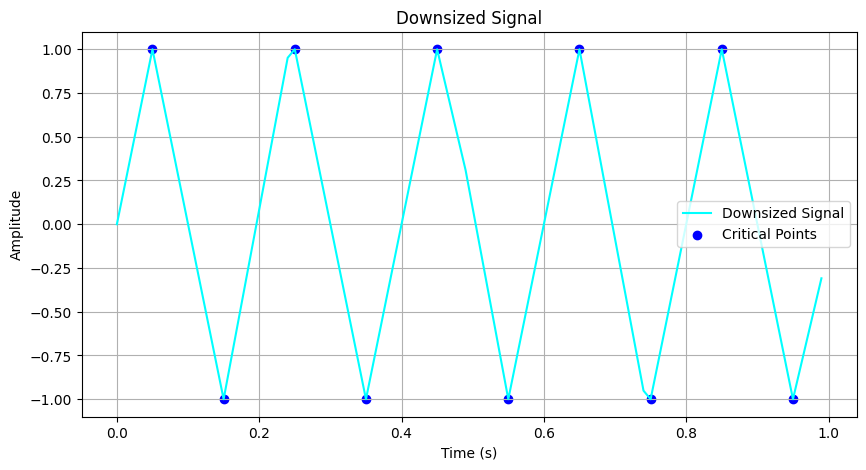

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5Hz sinusoidal signal sampled every 0.01 seconds
t = np.arange(0, 1.0, 0.01)  # Time array (10 seconds)
signal = np.sin(2 * np.pi * 5 * t)  # 5Hz sinusoidal signal

downsized_signal, indices, critical, critical_indices  = sin_sample(signal)


#printing the length of the array 
print("Downsized Signal:", len(downsized_signal))
print("Original Signal:", len(signal))


plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Original Signal', color='black')
plt.scatter(t[critical_indices], critical, color='blue', label='Critical Points')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t[indices], downsized_signal, color='cyan', label='Downsized Signal')
plt.scatter(t[critical_indices], critical, color='blue', label='Critical Points')
plt.title('Downsized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [183]:
!pip install pandas 

Defaulting to user installation because normal site-packages is not writeable


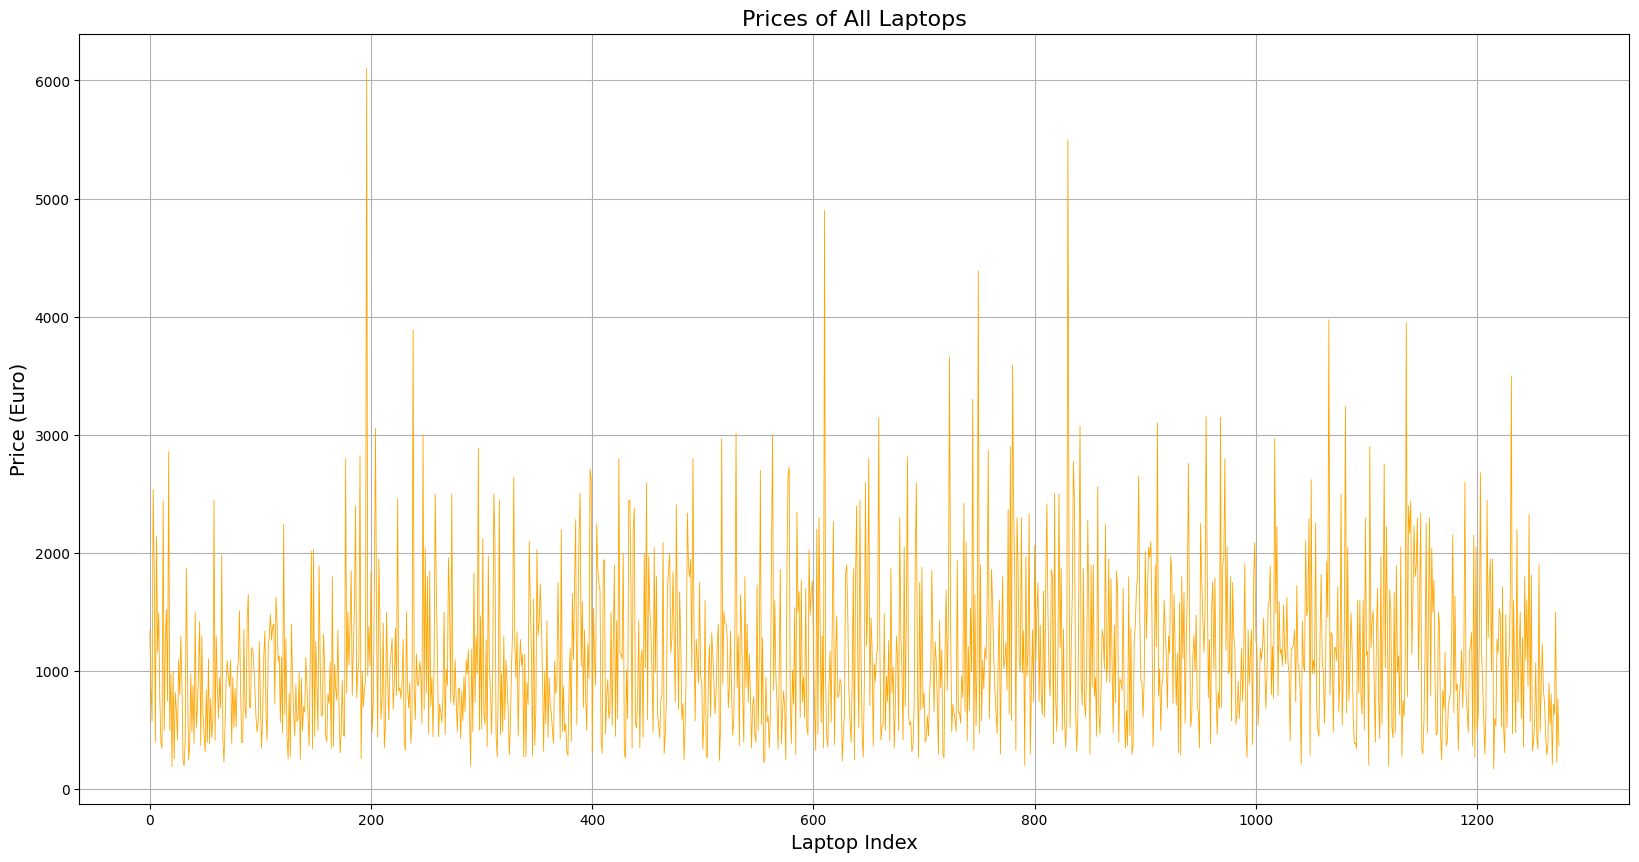

In [184]:
import pandas as pd
#importing the file 
df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")
import matplotlib.pyplot as plt
# creating the graph 
plt.figure(figsize=(20, 10))
# extracting the prices from the file and plotting the graph from the date inside. 
#I didn't need to send plot() the x axis since it take it automatically from the indexes of the file if not specified otherwise. 
plt.plot(df['Price (Euro)'], linestyle='-', linewidth= "0.6", color='orange')
#creating the name of the graph 
plt.title('Prices of All Laptops', fontsize=16)
#creating the x and y axis lables
plt.xlabel('Laptop Index', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.grid(True)
#printing the graph, we can see in this graph that the y axis is the prices and in the x axis the laptops organized by the indexes. 
plt.show()

The average price by company in descending order:
 Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the highest aversage price is: Razer

The highest average Laptop price is: 3346.14


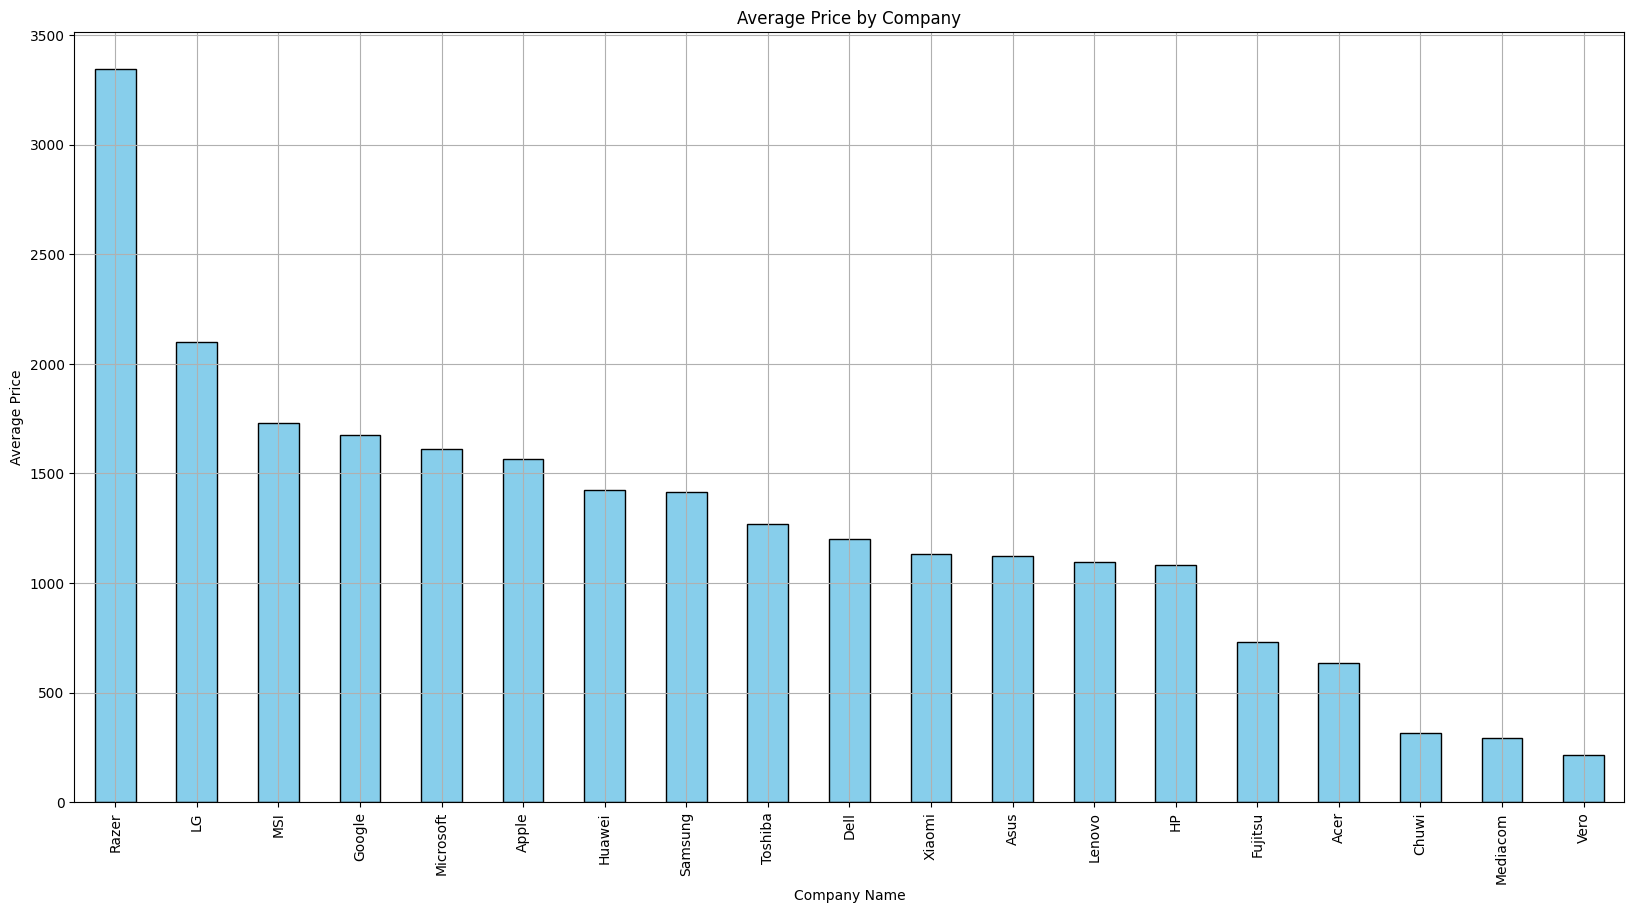

In [222]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 
df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

average_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending= False)
print("The average price by company in descending order:\n", average_prices)
print("\nThe company with the highest aversage price is:", average_prices.idxmax())
print("\nThe highest average Laptop price is:", average_prices.round(2).max())

plt.figure(figsize=(20,10))
average_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Price by Company")
plt.xlabel("Company Name")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

def unify_os(name):

    # Normalize the OS name to lower case 
    name = name.lower().strip()  

    if 'windows' in name:
        return 'Windows'
    elif 'mac' in name:
        return 'MacOS'
    elif 'linux' in name:
        return 'Linux'
    elif 'no os' in name or 'none' in name:
        return 'NO os'
    elif 'chrome' in name:
        return 'Chrome OS'
    elif 'android' in name:
        return 'Android'
    else:
        return 'Other'
    

df['OpSys'] = df['OpSys'].apply(unify_os)

unified_op_sys = df['OpSys'].unique().tolist()

print("Standardized Operating Systems:")
print(unified_op_sys)



Standardized Operating Systems:
['MacOS', 'NO os', 'Windows', 'Linux', 'Android', 'Chrome OS']


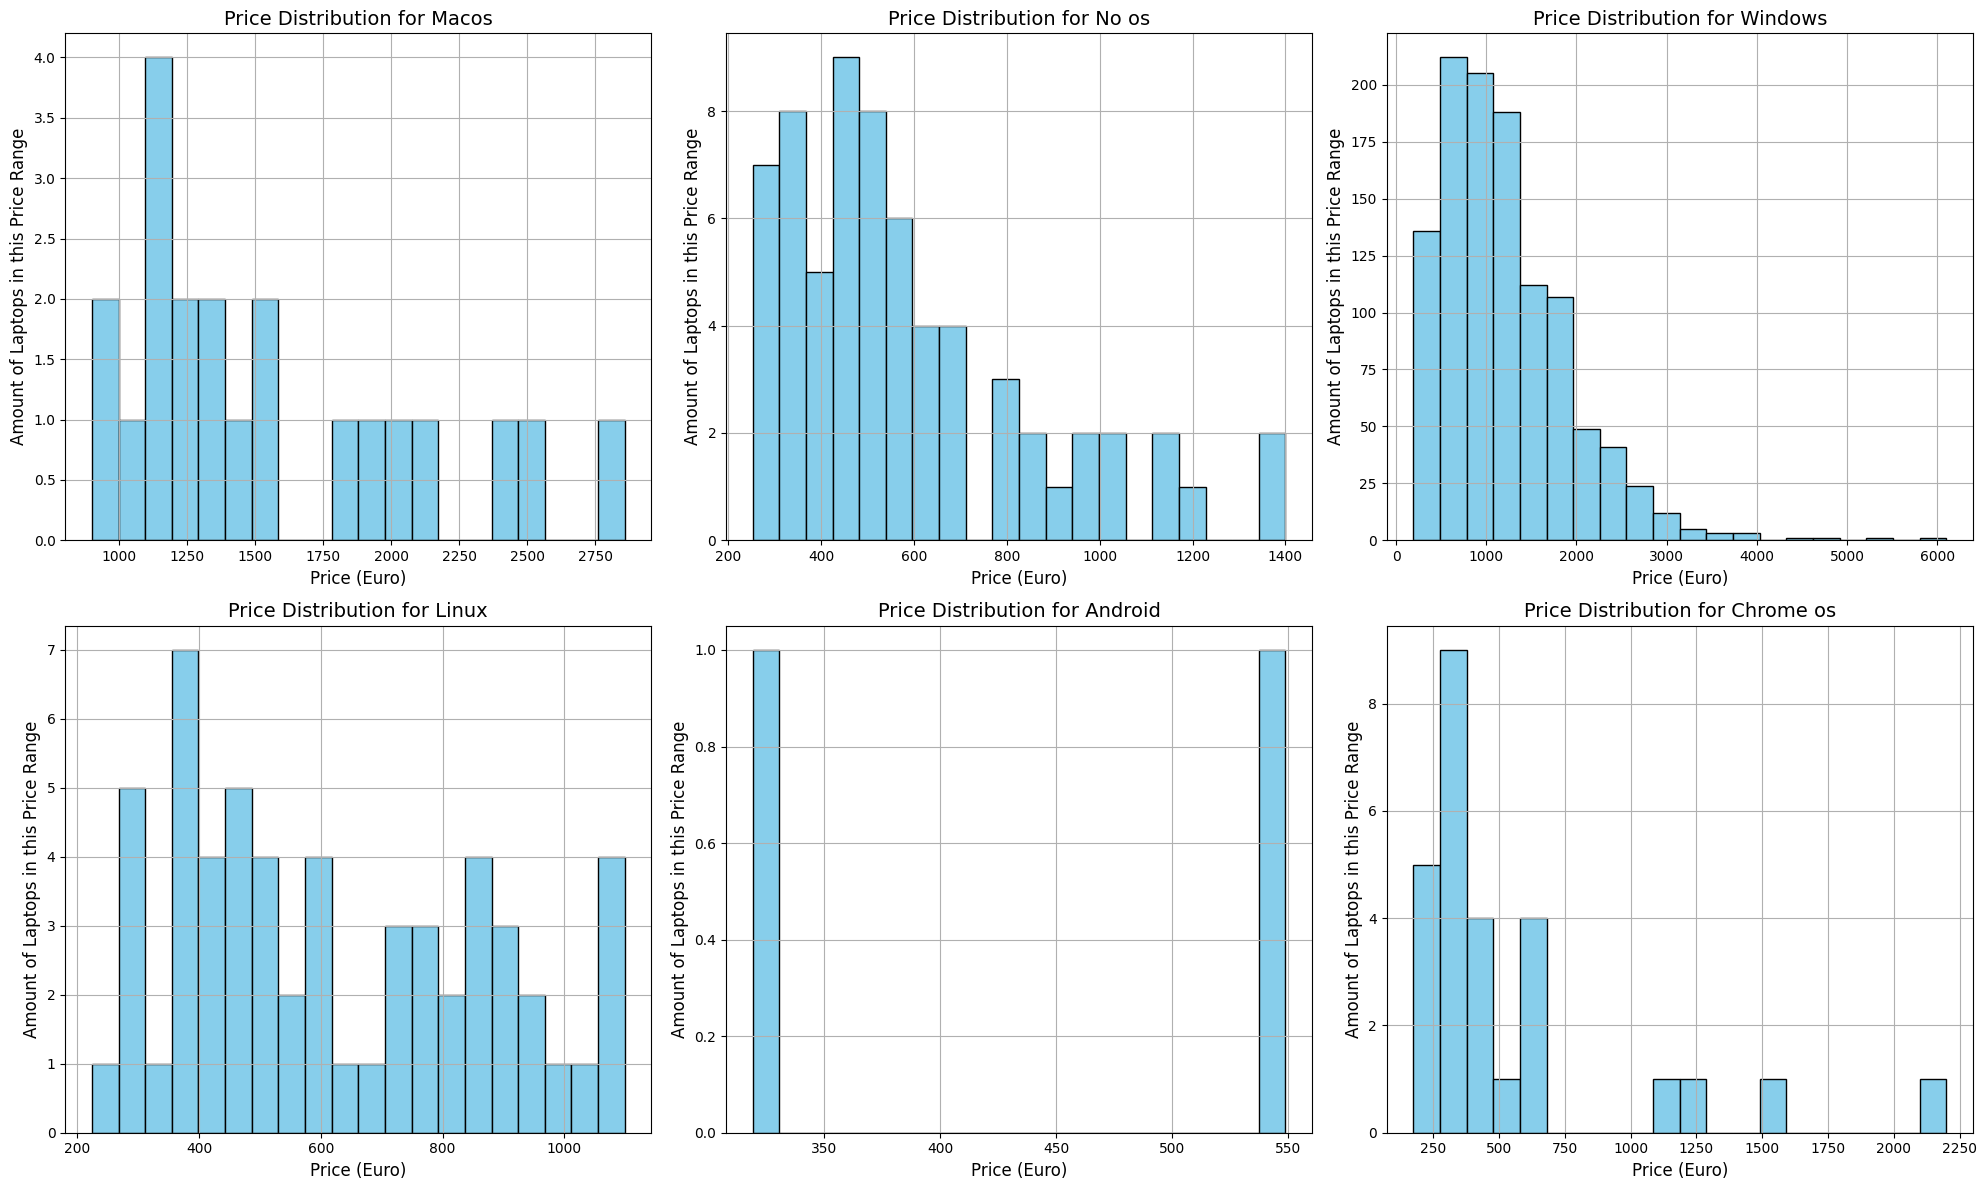

In [223]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

#call the function from the previous part 
df['OpSys'] = df['OpSys'].apply(unify_os)
# saving only the unique opsystems and changing them to an iterable list
unified_op_sys = df['OpSys'].unique().tolist()

# Adjust the overall figure size
plt.figure(figsize=(20, 12))  
#indexing the different operating systems with 2 counters starting with the index of 1 
for i, os in enumerate(unified_op_sys, start=1):
    # Create subplots 
    plt.subplot(2, 3, i) 
    # Filter data for the current OS so only their rows will show
    subset = df[df['OpSys'] == os]  
    #Create the hist bar that is with 20 different bins that divides 
    plt.hist(subset['Price (Euro)'], bins=20, color='skyblue', edgecolor='black')
    #dynamic titles for each graph 
    plt.title(f'Price Distribution for {os.capitalize()}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Amount of Laptops in this Price Range', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


The average price by RAM(GB) in descending order:
 RAM (GB)
64    3975.000000
32    3413.085882
24    2206.333333
16    1941.193081
12    1239.438400
8     1184.429413
6      619.356571
4      576.109101
2      247.634375
Name: Price (Euro), dtype: float64


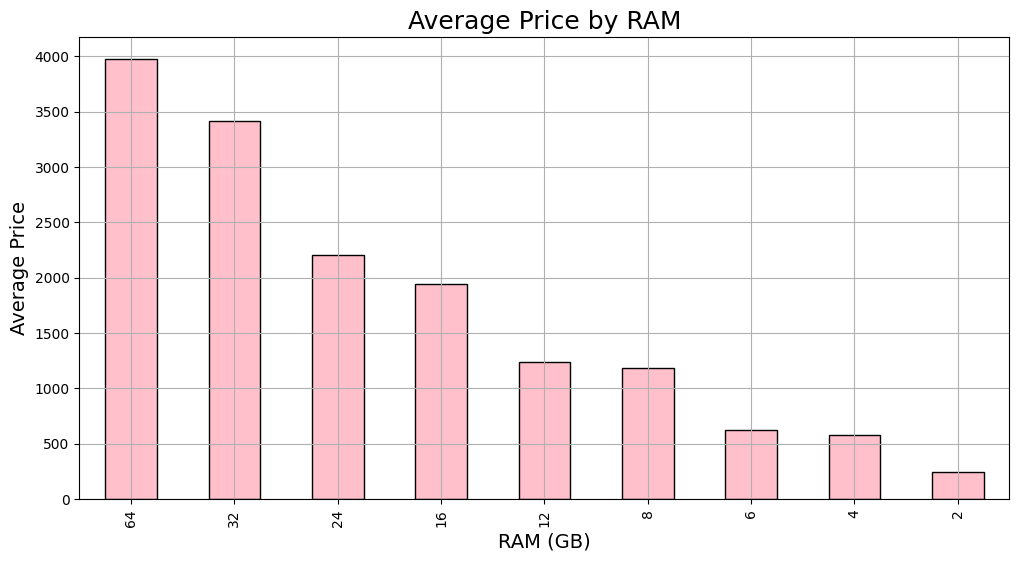

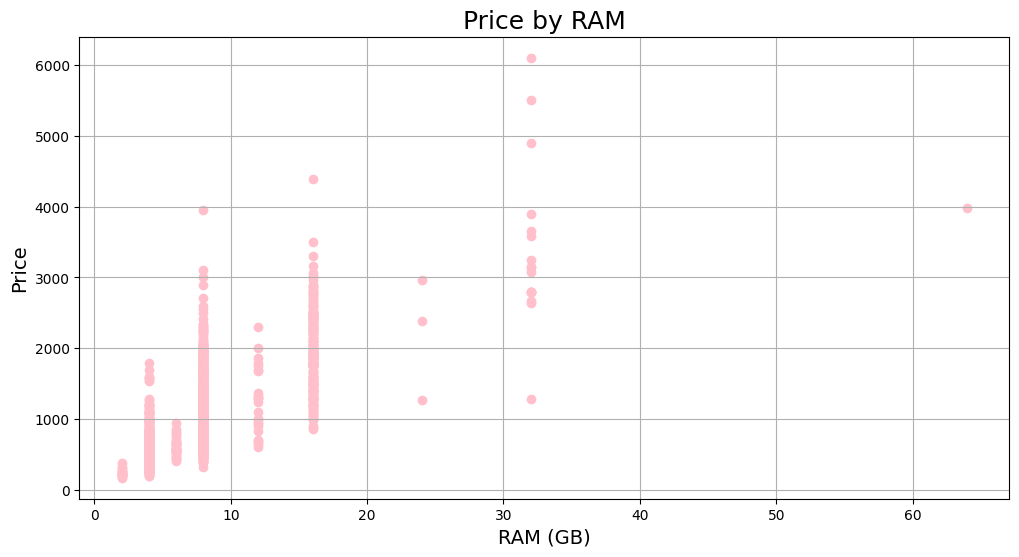

In [221]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

average_RAMprices = df.groupby('RAM (GB)')['Price (Euro)'].mean().sort_values(ascending= False)
print("The average price by RAM(GB) in descending order:\n", average_RAMprices)

plt.figure(figsize=(12,6))
average_RAMprices.plot(kind='bar', color='PINK', edgecolor='black')
plt.title("Average Price by RAM",fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Average Price", fontsize = 14)
plt.grid(True)
plt.show()

RAMprices = df.groupby('RAM (GB)')['Price (Euro)']
plt.figure(figsize=(12,6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='PINK')
plt.title("Price by RAM",fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

def MmeoryType(Memory):

    # Normalize the OS name to lower case 
    name = name.lower().strip()  

    if 'ssd' in name and 'hdd' in name:
        return 'SSD + HDD'
    elif 'ssd' in name:
        return 'SSD'
    elif 'hdd' in name:
        return 'HDD'
    elif 'flash storage' in name:
        return 'Flash Storage'
    elif 'hybrid' in name:
        return 'Hybrid'
    else:
        return 'Other'
    

df['Memory'] = df['Memory'].apply(MmeoryType)

unified_op_sys = df['OpSys'].unique().tolist()

print("Standardized Operating Systems:")
print(unified_op_sys)


import matplotlib.pyplot as plt

# Plot the price of all laptops
plt.figure(figsize=(12, 6))
plt.plot(df['Price (Euro)'], marker='o', linestyle='-', color='b')
plt.title('Prices of All Laptops', fontsize=16)
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.show()